<a href="https://colab.research.google.com/github/wenshanliu653/Udemy_Tensorflow_ML/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-01-18 03:02:30.530687


# **Creating data to view and fit**
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

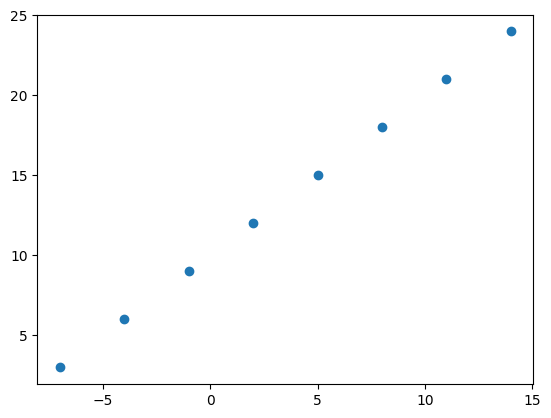

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X= np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21,24.0])

#Visulize
plt.scatter(X,y)

In [3]:
#Relation of X and y

y == X+10


array([ True,  True,  True,  True,  True,  True,  True,  True])

# **Regression input shapes and output shapes**

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [4]:
#Example input and output shape of a regression model

house_info =tf.constant(["bedroom", "bathroon", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroon', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
house_info.shape #house_info 的shape

TensorShape([3])

In [6]:
house_price.shape #house_price 的shape

TensorShape([1])

In [7]:
input_shape = house_info.shape
output_shape = house_price.shape

input_shape, output_shape # these are both scalars (no shape)


(TensorShape([3]), TensorShape([1]))

In [8]:

# Take a single example of X
input_shape = X[0].shape  #如果只放單一element.shape, 則不會有張量輸出

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

# **Steps in modelling with TensorFlow**
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**Creating a model ** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**Compiling a model **- defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

In [15]:
#Set random seed
tf.random.set_seed(42)

#Create a model using the Sequential API
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis =-1),y ,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 346ms/step - loss: 8.8179 - mae: 8.8179
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 8.6854 - mae: 8.6854
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 8.5529 - mae: 8.5529
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.4204 - mae: 8.4204
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 8.2879 - mae: 8.2879


In [16]:
#Check X, y

X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [19]:
#Make a preditction with the model
model.predict([17.0]) #當X=17時 y 應該要約27 , 但答案只有２５


1/1 [==============================] - 0s 46ms/step


array([[25.766577]], dtype=float32)